In [16]:
import yfinance as yahooFinance
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [5]:
def get_data(tickers, startDate, endDate):
    a1 = yahooFinance.Ticker(tickers[0]).history(start=startDate,end=endDate).reset_index()
    a2 = yahooFinance.Ticker(tickers[1]).history(start=startDate,end=endDate).reset_index()
    a3 = yahooFinance.Ticker(tickers[2]).history(start=startDate,end=endDate).reset_index()
    a4 = yahooFinance.Ticker(tickers[3]).history(start=startDate,end=endDate).reset_index()

    all_assets = [a1, a2, a3, a4]

    data = pd.DataFrame()
    for i, asset in enumerate(all_assets):
        asset = asset.reset_index()
        lb = tickers[i]
        data[lb] = asset['Close']
        
    data_w_ret = pd.concat([ data.iloc[1:], data.pct_change().iloc[1:] ], axis=1)
    data_w_ret.set_axis(tickers + [l + "_ret" for l in tickers], axis=1, inplace=True)
    ret_data = data_w_ret[[l + '_ret' for l in tickers]]
    return ret_data

In [7]:
tickers1 = ["VTI", "AGG", "DBC", "^VIX"]
startDate = datetime.datetime(2017,1,1)
endDate=datetime.datetime(2021,1,1)
ret1 = get_data(tickers1, datetime.datetime(2010,1,1), endDate)
tickers2 =['COPX', 'URA', 'LIT', 'REMX']
ret2 = get_data(tickers2, startDate, endDate)

/var/folders/tm/w_ghk37d14lgh4dy7_rf03240000gn/T/ipykernel_46997/2816435121.py:16: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  data_w_ret.set_axis(tickers + [l + "_ret" for l in tickers], axis=1, inplace=True)
/var/folders/tm/w_ghk37d14lgh4dy7_rf03240000gn/T/ipykernel_46997/2816435121.py:16: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  data_w_ret.set_axis(tickers + [l + "_ret" for l in tickers], axis=1, inplace=True)


In [8]:
ret1.corr()

,VTI_ret,AGG_ret,DBC_ret,^VIX_ret
VTI_ret,1.000000,-0.111985,0.489247,-0.747463
AGG_ret,-0.111985,1.000000,-0.054224,0.132086
DBC_ret,0.489247,-0.054224,1.000000,-0.381576
^VIX_ret,-0.747463,0.132086,-0.381576,1.000000


In [9]:
ret2.corr()

,COPX_ret,URA_ret,LIT_ret,REMX_ret
COPX_ret,1.000000,0.618403,0.751166,0.739172
URA_ret,0.618403,1.000000,0.542115,0.504156
LIT_ret,0.751166,0.542115,1.000000,0.742336
REMX_ret,0.739172,0.504156,0.742336,1.000000


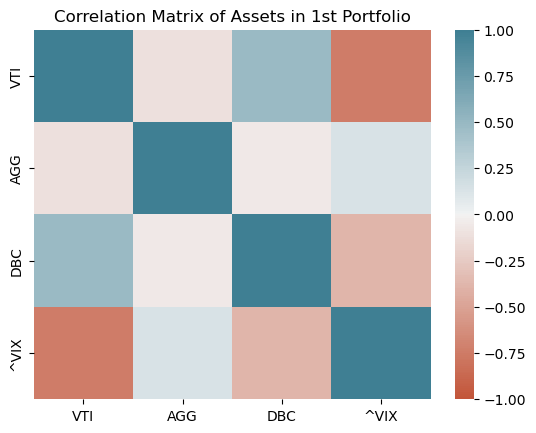

In [31]:
sns.heatmap(ret1.corr(), xticklabels=tickers1, yticklabels = tickers1, cmap=sns.diverging_palette(20, 220, n=200), vmin = -1, vmax = 1)
plt.title("Correlation Matrix of Assets in 1st Portfolio")
plt.savefig('corr1.png')
plt.show()

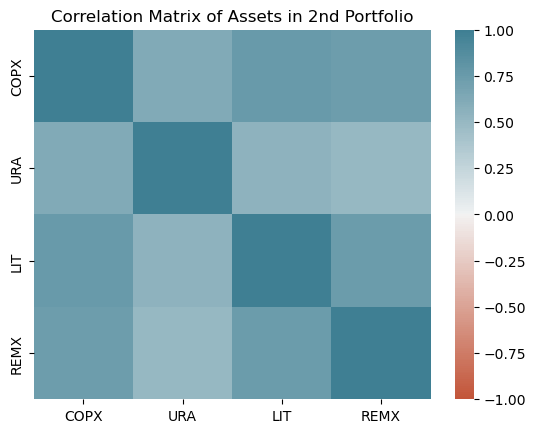

In [28]:
sns.heatmap(ret2.corr(), xticklabels=tickers2, yticklabels = tickers2, cmap=sns.diverging_palette(20, 220, n=200), vmin = -1, vmax = 1)
plt.title("Correlation Matrix of Assets in 2nd Portfolio")
plt.show()